In [1]:
# E4896_L06_lpc_diary
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy
import librosa

from IPython.lib.display import Audio

import zplane
import lpc

/Users/dpwe/homebrew/lib/python2.7/site-packages/librosa-0.4.0rc2-py2.7.egg/librosa/core/audio.py:34: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal


In [3]:
d, sr = librosa.load('sm1_cln.wav', sr=8000)
print d.shape
print sr
#Audio(d, rate=sr)

(27802,)
8000


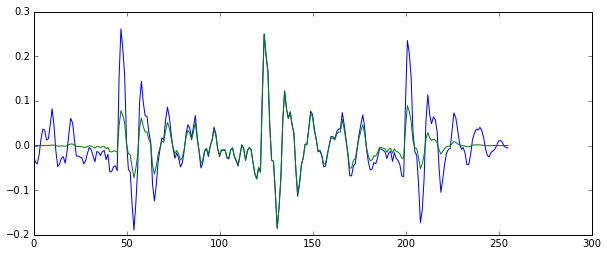

In [19]:
win = 256
dd = d[15000 + np.arange(win)]
wdd = np.hanning(win)*dd
plt.figure(figsize=(10, 4))
plot(np.arange(win), dd, np.arange(win), wdd)

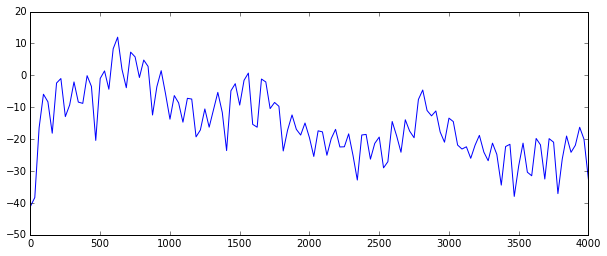

In [20]:
WDD = np.abs(np.fft.fft(wdd))[:129]
plt.figure(figsize=(10, 4))
plot(np.arange(129)*sr/256, 20*np.log10(WDD))

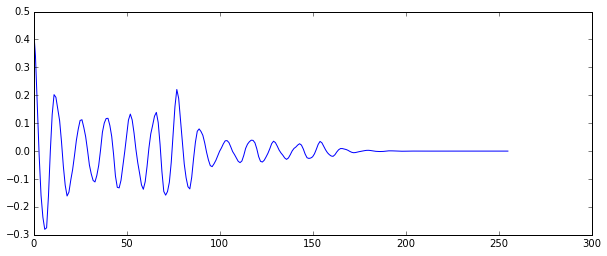

In [21]:
order = 24
rxx = np.correlate(wdd, wdd, 'full')
# Keep only for lags >= 0.
rxx = rxx[255:]
plt.figure(figsize=(10, 4))
plot(rxx)

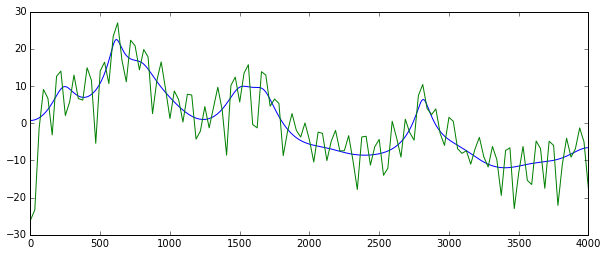

In [22]:
coeffs = np.dot(np.linalg.inv(scipy.linalg.toeplitz(rxx[:order])), rxx[1 : order + 1])
aa = np.hstack([1, -coeffs])
[W, H] = scipy.signal.freqz(1, aa)
plt.figure(figsize=(10, 4))
plot(W*sr/2/np.pi, 20*np.log10(np.abs(H)), np.arange(129)*sr/256, 20*np.log10(WDD)+15)

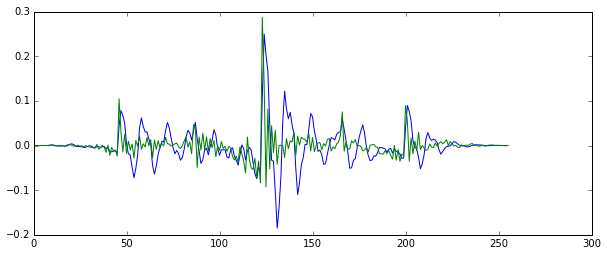

In [23]:
rdd = scipy.signal.lfilter(aa, 1 ,wdd)
plt.figure(figsize=(10, 4))
plot(np.arange(256), wdd, np.arange(256), rdd*2)

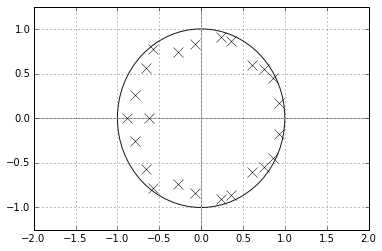

In [10]:
_ = zplane.zplane(np.roots([]), np.roots(aa))

In [24]:
[a, g, e] = lpc.lpcfit(d, 8)

In [25]:
print a.shape

(217, 9)


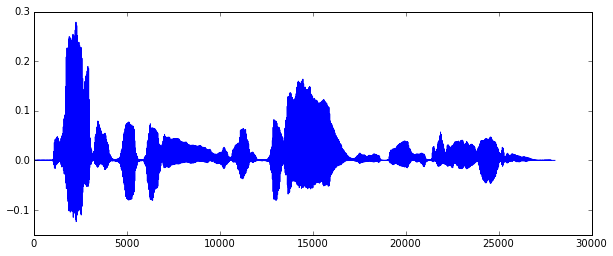

In [26]:
rd = lpc.lpcsynth(a, g, 40)
plt.figure(figsize=(10, 4))
plot(rd)

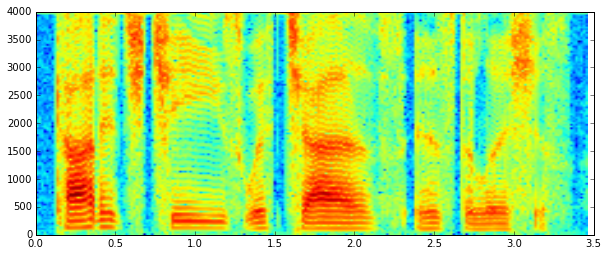

In [27]:
plt.figure(figsize=(10, 4))
_ = specgram(d, Fs=sr)

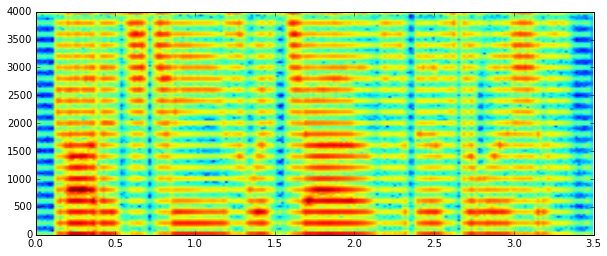

In [28]:
plt.figure(figsize=(10, 4))
_ = specgram(rd, Fs=sr)

In [29]:
Audio(rd, rate=sr)